In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from copy import deepcopy

df1 = deepcopy(df)
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
X = df1.drop(['Id', 'Species'],axis=1)
y = df1['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

<Axes: >

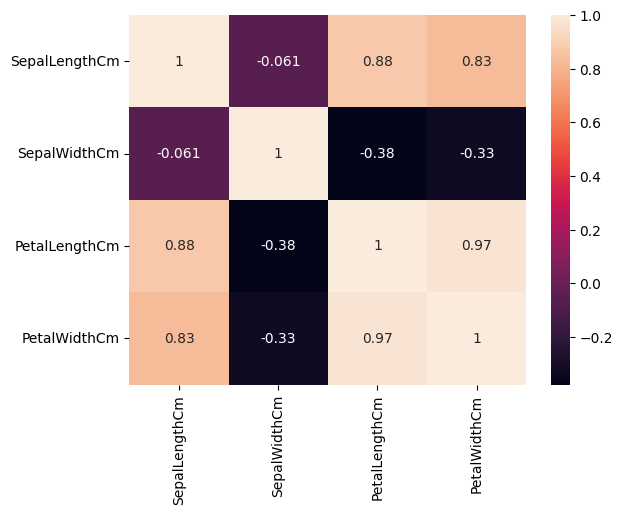

In [9]:
sns.heatmap(X_train.corr(),annot=True)

In [10]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
dtc_score_train = dtc.score(X_test,y_test)
print('Accuracy: ', dtc_score_train)

Accuracy:  1.0


In [12]:
dtc_score_test = dtc.score(X_test,y_test)
print('Accuracy: ', dtc_score_test)

Accuracy:  1.0


In [13]:
predict_test = dtc.predict(X_test)
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



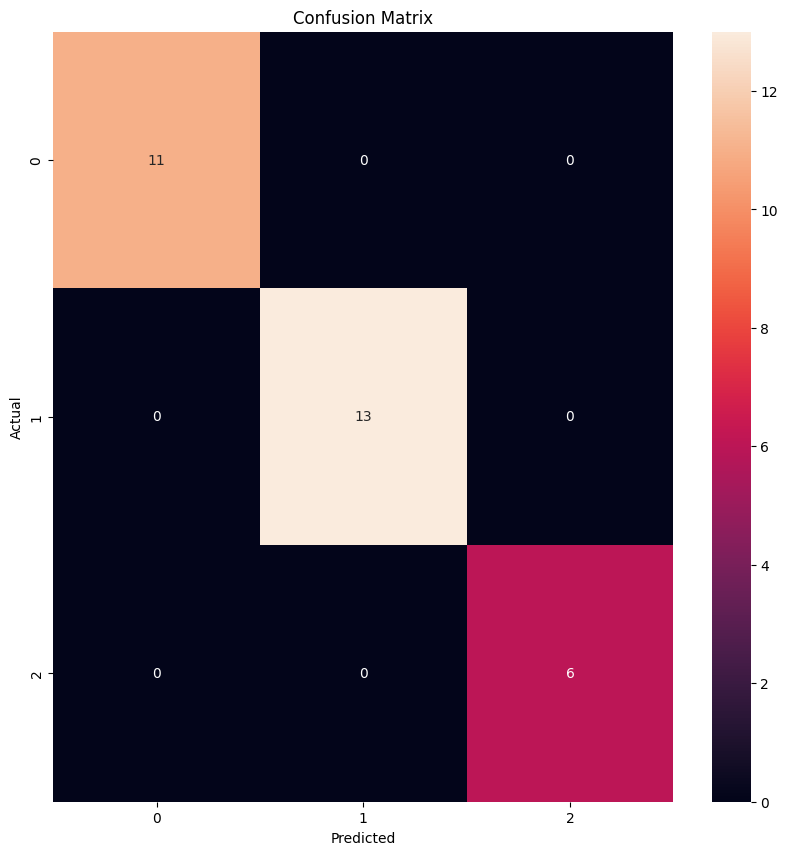

In [14]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, predict_test)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[Text(0.5, 0.9166666666666666, 'PetalWidthCm <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'PetalWidthCm <= 1.75\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.3076923076923077, 0.5833333333333334, 'PetalLengthCm <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.15384615384615385, 0.4166666666666667, 'PetalWidthCm <= 1.65\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'PetalWidthCm <= 1.55\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.25, 'PetalLengthCm <= 5.45\nentropy = 0.918\nsamples

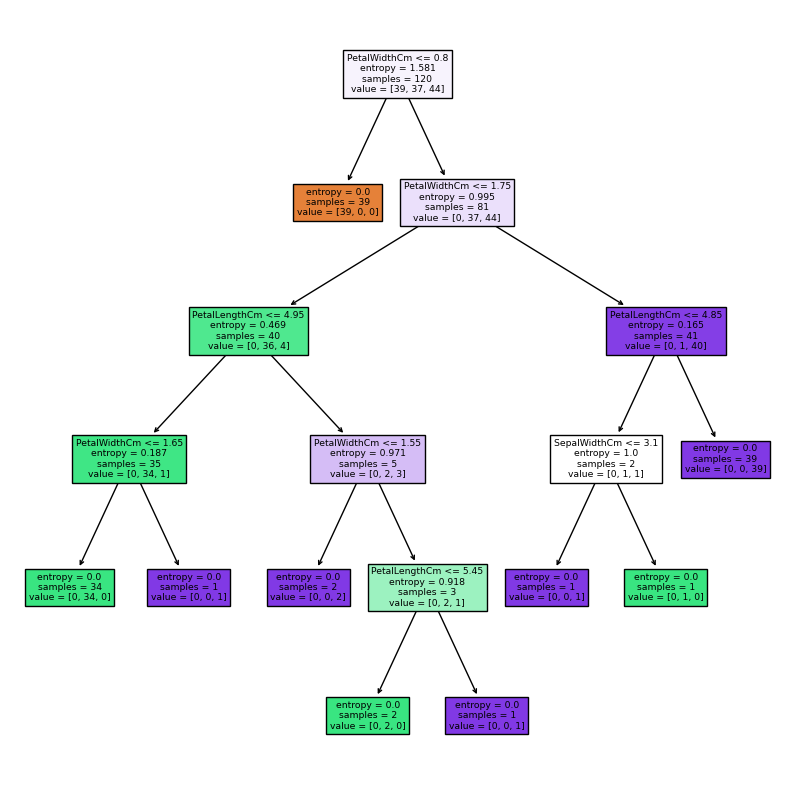

In [15]:
plt.figure(figsize=(10,10))
tree.plot_tree(dtc,filled=True, feature_names=['SepalLengthCm',
                                               'SepalWidthCm',
                                               'PetalLengthCm',
                                               'PetalWidthCm'])